In [40]:
import numpy as np 
from math import exp
from sklearn.metrics import mean_squared_error
from math import sqrt


# 1. Reads in the data, ignoring the first row (header) and first column (index).
filename = "./x06Simple.csv"
data = np.loadtxt(filename, delimiter=",", skiprows=1)

# 2. Randomizes the data

import random


datanp = np.array(data).astype(int)


np.random.seed(0)
np.random.shuffle(datanp)


X = [datanp[:,1],datanp[:,2]]
X=np.transpose(np.array(X))
Y = np.array(datanp[:,3])

#Selects the first 2/3 (round up) of the data for training and the remaining for testing
a= datanp.shape


training_X = X[:(round(2/3*a[0]))]
testing_X = X[(round(2/3*a[0])):]
training_Y = Y[:(round(2/3*a[0]))]
testing_Y = Y[(round(2/3*a[0])):]


#Standardize the data
mean = np.mean(training_X, axis=0)
std = np.std(training_X, axis=0, ddof=1)
std_training_X = (training_X-mean)/std

#Adding Bias on training X
std_XTrain_bias=[]
for i in std_training_X:
    std_XTrain_bias.append([1,i[0],i[1]])
std_XTrain_bias = np.array(std_XTrain_bias)


#Adding Bias on testing X
std_testing_data = (testing_X-mean)/std

std_XTest_bias=[]
for i in std_testing_data:
    std_XTest_bias.append([1,i[0],i[1]])
std_XTest_bias = np.array(std_XTest_bias)



In [41]:
learning_rate = 0.01
theta = np.random.rand(3,1)*2-1



print(theta)

[[ 0.51723125]
 [-0.78818479]
 [-0.05279916]]


In [42]:
def predict(theta, X):
    return np.dot(X, theta)

In [43]:
def batch_gradient_descent(theta, learning_rate):
#     m = X.shape[0]
    iterations = 1000
    
    
    
    
    
    training_X = X[:(round(2/3*a[0]))]
    testing_X = X[(round(2/3*a[0])):]
    training_Y = Y[:(round(2/3*a[0]))]
    testing_Y = Y[(round(2/3*a[0])):]


    #Standardize the data
    mean = np.mean(training_X, axis=0)
    std = np.std(training_X, axis=0, ddof=1)
    std_training_X = (training_X-mean)/std

    #Adding Bias on training X
    std_XTrain_bias=[]
    for i in std_training_X:
        std_XTrain_bias.append([1,i[0],i[1]])
    std_XTrain_bias = np.array(std_XTrain_bias)


    #Adding Bias on testing X
    std_testing_data = (testing_X-mean)/std

    std_XTest_bias=[]
    for i in std_testing_data:
        std_XTest_bias.append([1,i[0],i[1]])
    std_XTest_bias = np.array(std_XTest_bias)
    
#     pred = 0
#     pred_testing = 0
    
    All_RMSE_testing=[]
    All_RMSE_train=[]
    
    for iteration in range(iterations):

#         gradients = std_XTrain_bias.T@((std_XTrain_bias@theta) - training_Y)
#         theta = theta - learning_rate * gradients
        training_Y = np.reshape(training_Y, (-1,1))
        gradients = std_XTrain_bias.T.dot(std_XTrain_bias.dot(theta) - training_Y)
        theta = theta - learning_rate * gradients
        
#         print("gradients shape:", np.shape(gradients))
#         print("std_XTrain_bias shape:", np.shape(std_XTrain_bias))
#         print("training_Y :", np.shape(training_Y))
        
        
        
        
#         print("theta:", theta)
#         print("theta shape:", np.shape(theta))

#         RMSE for training
        Y_hat_training = predict(theta, std_XTrain_bias)
    
        error_training =  np.sum((training_Y-Y_hat_training)**2)
        RMSE_train = np.sqrt(error_training/29)
        print("RMSE_train: ",RMSE_train)
        All_RMSE_train.append(RMSE_train)
        
#         print("training_Y",np.shape(training_Y))
#         print("error_training",error_training)
#         print("RMSE_train", np.shape(RMSE_train))
        
        
        
        
        
        

       # RMSE for testing
        Y_hat_testing = predict(theta, std_XTest_bias)
    
        testing_Y = np.reshape(testing_Y, (-1,1))
    
        error_testing = np.sum((testing_Y-Y_hat_testing)**2)
        RMSE_testing = np.sqrt(error_testing/15)
        All_RMSE_testing.append(RMSE_testing)
        #print(np.shape(error_testing))
        #print(np.shape(testing_Y))
        
        print("RMSE_testing: ", RMSE_testing)
#         RMSE_testing = np.sqrt(((testing_Y-Y_hat_testing)**2)/15)
        #print("RMSE_testing:",  RMSE_testing)
        
        #rmse_train = np.concatenate(RMSE_train)

        #rmse_train = sum(rmse_train)
        
#         for i in rmse_train:
#             summ =+ i
            
        #print(summ)    
        #print(rmse_train)
        if np.sum(RMSE_train)<2**-32 :
            break
        
        
    from matplotlib import pyplot as plt 

    fig = plt.figure()
    plt.plot(All_RMSE_testing,c='red', label = 'RMSE_testing' )
    plt.plot(All_RMSE_train,c='blue', label = 'RMSE_train')
    plt.legend()
    plt.show()
    
    
    print("theta:",theta )   
        
        
   



RMSE_train:  2556.0845381012764
RMSE_testing:  2094.6482650661555
RMSE_train:  1859.799358685845
RMSE_testing:  1474.0317999615847
RMSE_train:  1380.2947520481637
RMSE_testing:  1062.7211960118823
RMSE_train:  1058.3577926381845
RMSE_testing:  809.4813568241614
RMSE_train:  850.5126040463022
RMSE_testing:  673.0768568915812
RMSE_train:  723.0911532999536
RMSE_testing:  614.1274406575765
RMSE_train:  649.2454516565793
RMSE_testing:  597.7996059914117
RMSE_train:  608.5204606007325
RMSE_testing:  600.3859192338483
RMSE_train:  586.8605319735559
RMSE_testing:  609.3279801487109
RMSE_train:  575.6011259641538
RMSE_testing:  619.0990749185156
RMSE_train:  569.82433241742
RMSE_testing:  627.6694818879078
RMSE_train:  566.8813026245845
RMSE_testing:  634.5345179815772
RMSE_train:  565.3874346720976
RMSE_testing:  639.7820769975311
RMSE_train:  564.6305562449342
RMSE_testing:  643.686292601375
RMSE_train:  564.2474267449038
RMSE_testing:  646.5428906247091
RMSE_train:  564.0535700751477
RMSE_t

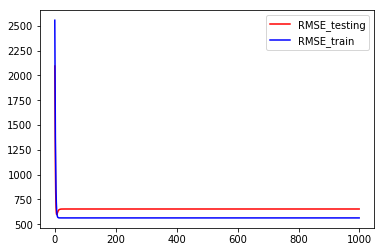

theta: [[3343.27586207]
 [1036.63016523]
 [-295.66859639]]


In [44]:
batch_gradient_descent(theta,learning_rate)